In [36]:
#Load CIFAR10 dataset
from tensorflow.keras.datasets import cifar10

#Load the dataset
(X_train,y_train), (X_test,y_test) = cifar10.load_data()




In [37]:
(X_train[0].shape ,
y_train[0].shape)

((32, 32, 3), (1,))

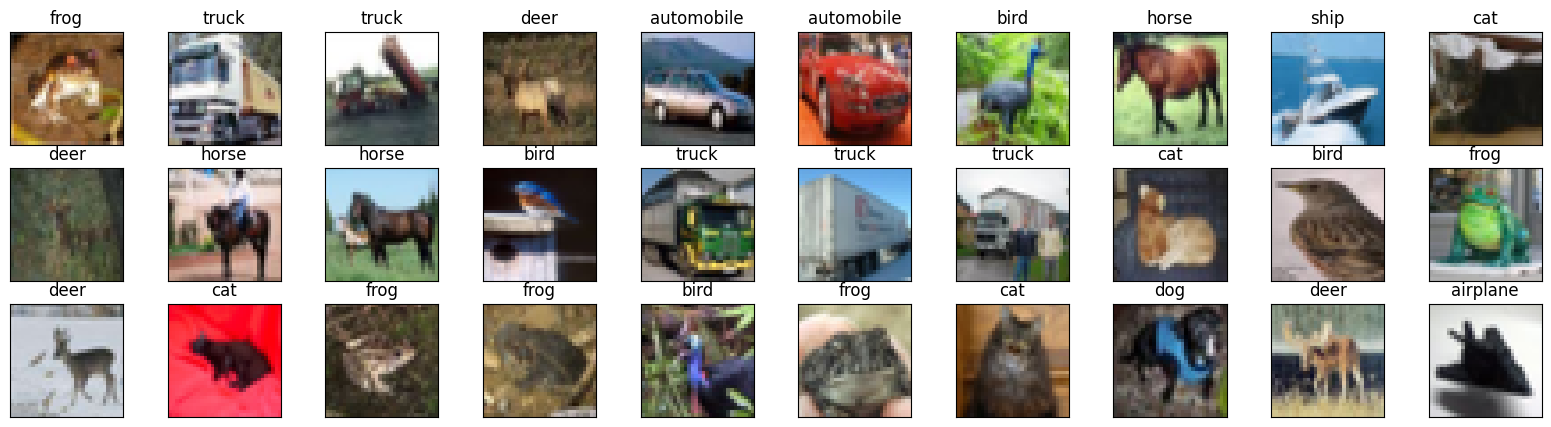

In [47]:
#Visualize the images

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

fig = plt.figure(figsize=(20,5))

class_names = ["airplane", "automobile", "bird", "cat", "deer", 
               "dog", "frog", "horse", "ship", "truck"]

for i in range(30):
    ax = fig.add_subplot(3,10,i+1,xticks=[],yticks=[])
    ax.imshow(X_train[i])
    ax.set_title(class_names[np.argmax(y_train[i])]) 



In [39]:
#Rescale the images

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255



In [40]:
#Break the data into train, test & validation

num_classes = len(np.unique(y_train))

#OHE
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)

(X_train,X_validation) = (X_train[:40000],X_train[40000:])
(y_train,y_validation) = (y_train[:40000],y_train[40000:])




In [42]:
(X_train.shape,X_validation.shape),(y_train.shape,y_validation.shape)

(((40000, 32, 32, 3), (10000, 32, 32, 3)), ((40000, 10), (10000, 10)))

In [53]:
#Define model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

model = Sequential()

model.add(Conv2D(32,input_shape=(32,32,3),kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add (Conv2D(padding='same',filters=128,kernel_size=(2,2),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout((0.5)))
model.add(Dense(activation='softmax',units=num_classes))

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320,074 (1.22 MB)

 Trainable params: 320,074 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.compile(optimizer='adam', loss = 'binary_crossentropy',metrics=['accuracy'])

In [68]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss',patience=5,verbose=1)
model_checkpoint = ModelCheckpoint(
    save_best_only=True,
    filepath='output/img.classifer.keras',
    verbose =1
    )


model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=40,
    callbacks=[early_stopping,model_checkpoint],
    shuffle = True,
    validation_data = (X_validation,y_validation)
    )

Epoch 1/40
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7851 - loss: 0.1065
Epoch 1: val_loss improved from inf to 0.13403, saving model to output/img.classifer.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.7851 - loss: 0.1065 - val_accuracy: 0.7293 - val_loss: 0.1340
Epoch 2/40
311/313 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7929 - loss: 0.1036
Epoch 2: val_loss improved from 0.13403 to 0.13225, saving model to output/img.classifer.keras
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.7929 - loss: 0.1036 - val_accuracy: 0.7307 - val_loss: 0.1322
Epoch 3/40
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8006 - loss: 0.1010
Epoch 3: val_loss did not improve from 0.13225
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.8006 - loss: 0.1010 - val_accuracy: 0.7242 - val_loss: 0.1384
Epoch 4/40
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8106 - loss: 0.0966
Epoch 4: val_loss did not improve from 0.13225
313/313 ━━━━━━━━━

In [69]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('output/img.classifer.keras')

# Check model summary (optional)
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 960,224 (3.66 MB)

 Trainable params: 320,074 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 640,150 (2.44 MB)

In [70]:
y_pred  = model.predict(X_test)
y_pred.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


(10000, 10)

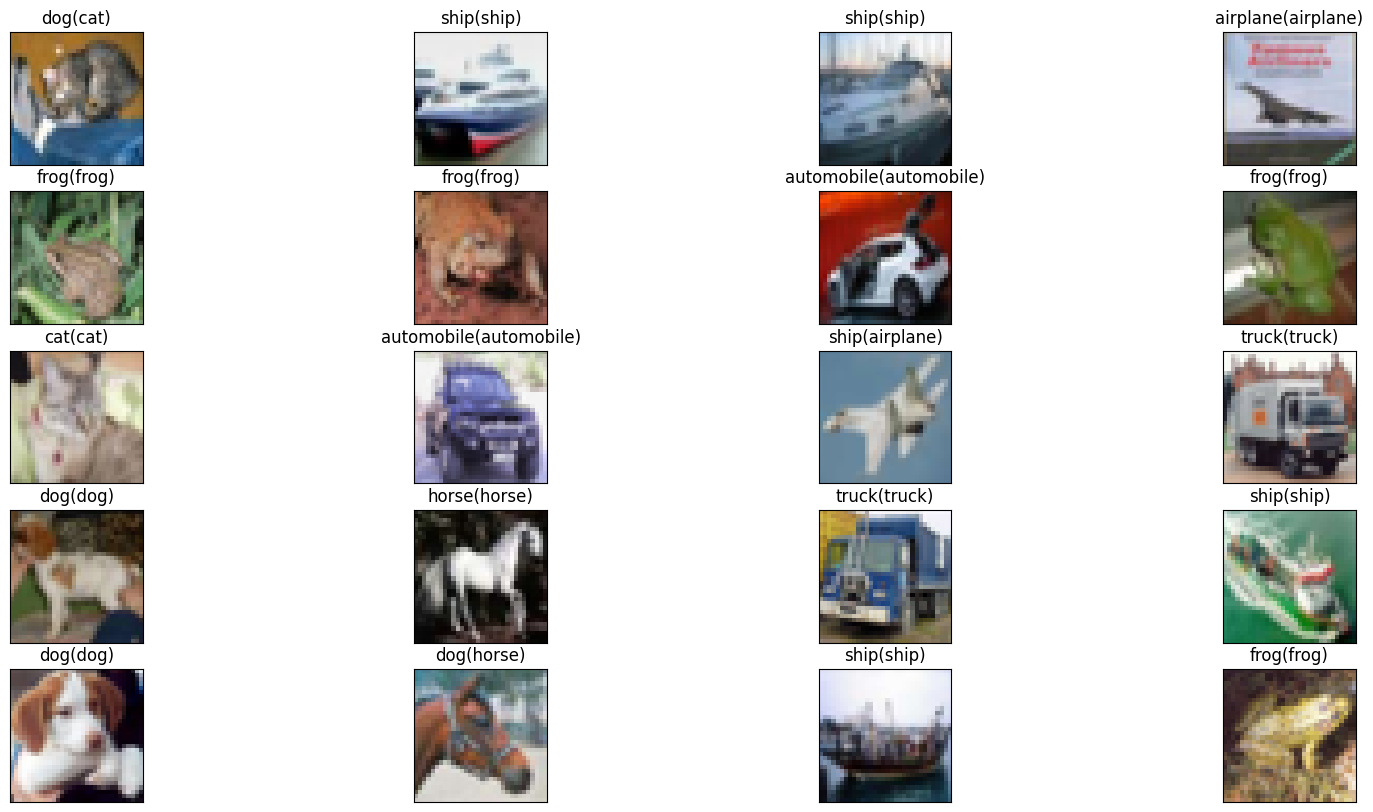

In [71]:
fig = plt.figure(figsize=(20,10))

for i in range(20):
    ax = fig.add_subplot(5,4,i+1,xticks=[],yticks=[])
    ax.imshow(X_test[i])
    ax.set_title(
        class_names[np.argmax(y_pred[i])]
        + '(' + class_names[np.argmax(y_test[i])] + ')'
        )

In [62]:
model.load_weights('output\img.classifer.keras')


ValueError: A total of 1 objects could not be loaded. Example error message for object <keras.src.optimizers.adam.Adam object at 0x00000248A66F5370>:

'Unable to synchronously open object (bad object header version number)'

List of objects that could not be loaded:
[<keras.src.optimizers.adam.Adam object at 0x00000248A66F5370>]